# Capstone Project: Malicious URL detection using Machine Learning and Artificial Intelligence


### Model Experiments
#### Explore models with high accuracy and low processing time

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"
import time
import warnings
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import xgboost as xgb
from lightgbm import LGBMClassifier
import sklearn.metrics as metrics
# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
#Collect Initial Data
df3 = pd.read_csv('../data/finaldataset/maliciousurl_processed.csv')


In [3]:
df3.head()

,url,type,category,url_len,domain,root_domain,count_at,count-question,count_hyphen,count_equal,...,count_https,count_http,count_www,digits_count,hostname_length,sus_url,letters_count,short_url,use_of_ip,url_region
0,br-icloud.com.br,phishing,3,16,br-icloud.com.br,1310791,0,0,1,0,...,0,0,0,0,0,0,13,0,0,26
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,58335668,0,0,0,0,...,0,0,0,1,0,0,29,0,0,72
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,28611805,0,0,0,0,...,0,0,0,1,0,0,25,0,0,72
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,89045308,0,1,1,4,...,0,1,0,7,17,0,60,0,0,18
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,76838614,0,1,1,3,...,0,1,0,22,23,0,199,0,0,72


In [4]:
df3.shape

(651191, 31)

###  Train/Test Split

With your data prepared, split it into a train and test set.

In [5]:
X = df3.drop(['url','type','category','domain'],axis=1)
y = df3['category']

## Advance Modelling 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
results = {}

### Exploring the models with top score from section 2 of the project

### 1. Random Forest Classifier

In [8]:
#Please note the below code takes time to execute, params were adjusted in rerun based on other exploration in next phase
rf = RandomForestClassifier(n_estimators=250,max_depth=25)
start_time = time.time()
rf.fit(X_train,y_train)
elapsed_time = time.time() - start_time/ 60  # convert to minutes
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_rf)
results[rf] = score*100
print("accuracy:   %s" % score)
print ("%s : %s |Time:%s" %("RandomForestClassifier", score,elapsed_time))

              precision    recall  f1-score   support

      benign       0.94      0.99      0.96     85778
  defacement       0.96      1.00      0.98     19104
    phishing       0.99      0.93      0.96      6521
     malware       0.90      0.68      0.77     18836

    accuracy                           0.94    130239
   macro avg       0.95      0.90      0.92    130239
weighted avg       0.94      0.94      0.94    130239

accuracy:   0.9410468446471487
RandomForestClassifier : 0.9410468446471487 |Time:1658736440.4517531


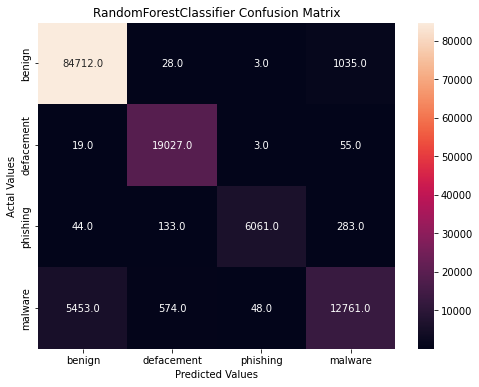

In [9]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('RandomForestClassifier Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig("images/cm-RandomForestClassifier")
plt.show()

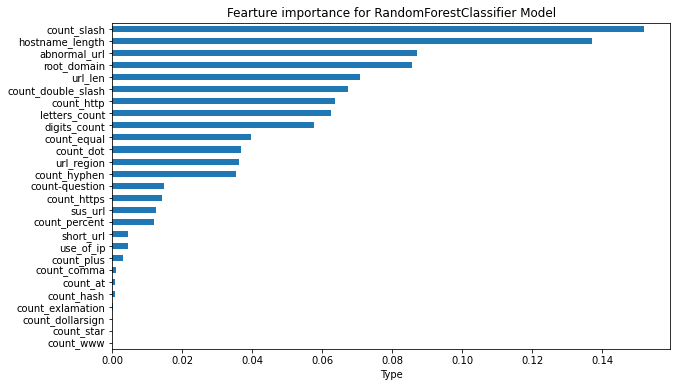

In [10]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6)).set(xlabel='Type',title = 'Fearture importance for RandomForestClassifier Model')
plt.savefig("images/fearture-importance-RandomForestClassifier")

In [11]:
## 2. XGboost Classifier

In [24]:
#Please note the below code takes time to execute, params were adjusted in rerun based on other exploration in next phase
xgb_c = xgb.XGBClassifier(n_estimators= 500 ,max_depth=19)

start_time = time.time()
xgb_c.fit(X_train,y_train)
elapsed_time = time.time() - start_time/ 60  # convert to minutes
y_pred_x = xgb_c.predict(X_test)
print(classification_report(y_test,y_pred_x,target_names=['benign', 'defacement','phishing','malware']))


score = metrics.accuracy_score(y_test, y_pred_x)
results[xgb_c] = score*100
print("accuracy:   %s" %  score)
print ("%s : %s |Time:%s" %("XGBClassifier", score,elapsed_time))

              precision    recall  f1-score   support

      benign       0.96      0.98      0.97     85778
  defacement       0.98      1.00      0.99     19104
    phishing       0.99      0.95      0.97      6521
     malware       0.89      0.79      0.83     18836

    accuracy                           0.95    130239
   macro avg       0.95      0.93      0.94    130239
weighted avg       0.95      0.95      0.95    130239

accuracy:   0.953669791690661
XGBClassifier : 0.953669791690661 |Time:1658750096.8461468


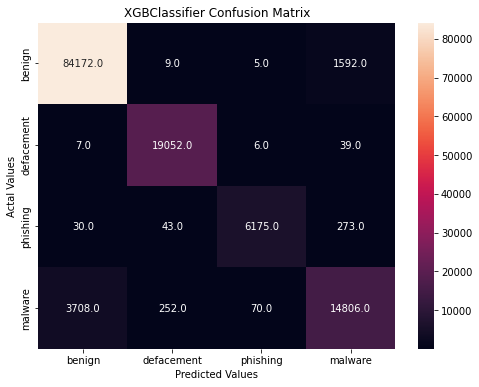

In [25]:
cm = confusion_matrix(y_test, y_pred_x)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('XGBClassifier Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig("images/cm-XGBClassifier")
plt.show()

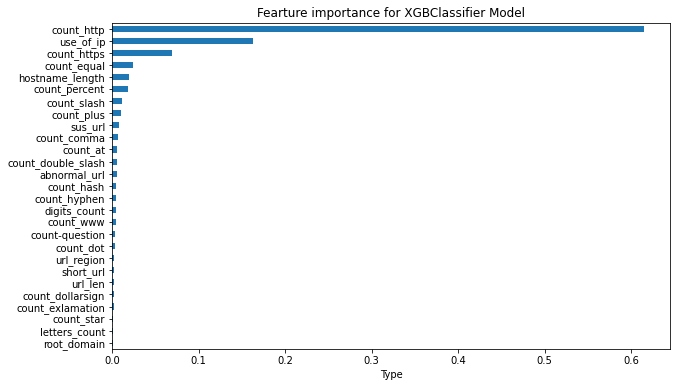

In [26]:
feat_importances = pd.Series(xgb_c.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6)).set(xlabel='Type',title = 'Fearture importance for XGBClassifier Model')
plt.savefig("images/fearture-importance-XGBClassifier")

## 3. Light GBM Classifier

In [27]:
#Please note the below code takes time to execute, params were adjusted in rerun based on other exploration in next phase
lgb = LGBMClassifier(n_estimators=1000,max_depth=24)
start_time = time.time()
LGB_C = lgb.fit(X_train, y_train)
elapsed_time = time.time() - start_time/ 60  # convert to minutes

y_pred_lgb = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred_lgb,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_lgb)
results[lgb] = score*100
print("accuracy:   %s" % score)
print ("%s : %s |Time:%s" %("LGBMClassifier", score,elapsed_time))

              precision    recall  f1-score   support

      benign       0.94      0.98      0.96     85778
  defacement       0.98      1.00      0.99     19104
    phishing       0.97      0.94      0.96      6521
     malware       0.89      0.72      0.80     18836

    accuracy                           0.95    130239
   macro avg       0.95      0.91      0.93    130239
weighted avg       0.94      0.95      0.94    130239

accuracy:   0.9452314590867559
LGBMClassifier : 0.9452314590867559 |Time:1658750726.689192


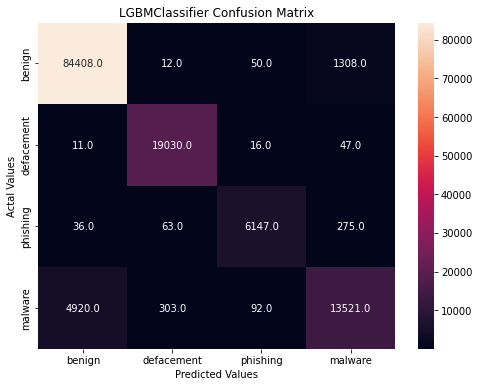

In [28]:
cm = confusion_matrix(y_test, y_pred_lgb)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('LGBMClassifier Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig("images/cm-LGBMClassifier")
plt.show()

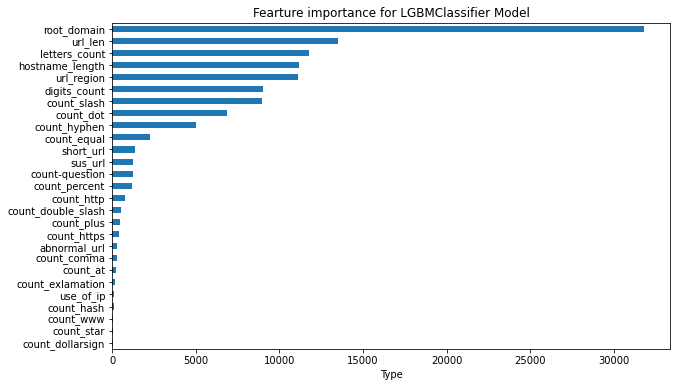

In [29]:
feat_importances = pd.Series(lgb.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6)).set(xlabel='Type',title = 'Fearture importance for LGBMClassifier Model')
plt.savefig("images/fearture-importance-LGBMClassifier")

In [30]:
## 4. ExtraTreesClassifier

In [31]:
#Please note the below code takes time to execute
xtc = ExtraTreesClassifier(n_estimators=100,max_depth=26)
start_time = time.time()
XTC_C = xtc.fit(X_train, y_train)
elapsed_time = time.time() - start_time/ 60  # convert to minutes

y_pred_xtc = XTC_C.predict(X_test)
print(classification_report(y_test,y_pred_xtc,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_xtc)
results[xtc] = score*100
print("accuracy:   %0.3f" % score)
print ("%s : %s |Time:%s" %("ExtraTreesClassifier", score,elapsed_time))

              precision    recall  f1-score   support

      benign       0.91      1.00      0.95     85778
  defacement       0.92      0.99      0.96     19104
    phishing       0.99      0.88      0.94      6521
     malware       0.95      0.51      0.66     18836

    accuracy                           0.92    130239
   macro avg       0.94      0.84      0.88    130239
weighted avg       0.92      0.92      0.91    130239

accuracy:   0.920
ExtraTreesClassifier : 0.919655402759542 |Time:1658750889.3580785


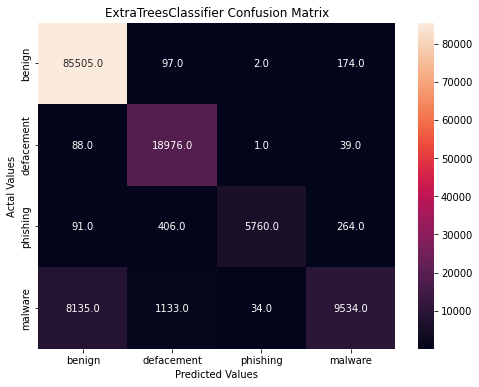

In [32]:
cm = confusion_matrix(y_test, y_pred_xtc)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('ExtraTreesClassifier Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig("images/cm-ExtraTreesClassifier")
plt.show()

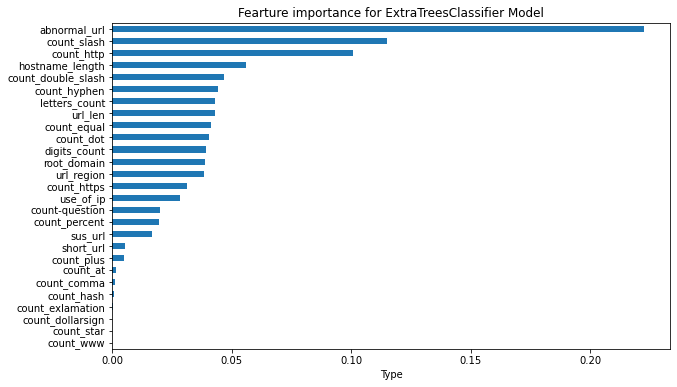

In [33]:
feat_importances = pd.Series(xtc.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6)).set(xlabel='Type',title = 'Fearture importance for ExtraTreesClassifier Model')
plt.savefig("images/fearture-importance-ExtraTreesClassifier")

In [34]:
best_model = max(results, key=results.get)
print('All model results %s',results)

All model results %s {RandomForestClassifier(max_depth=25, n_estimators=250): 94.10468446471486, XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...): 95.2740730503152, LGBMClassifier(max_depth=24, n_estimators=1000): 94.52314590867559, ExtraTreesClassifier(): 93.86589270495013, XGBClassifier(

In [35]:
print("Best Classifier %s",best_model)

Best Classifier %s XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


### Inference:


- RandomForest and Light GBM Classifier gave the best use of features.
- XGBClassifier was the best classifier followed by LGBMClassifier
